![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_2/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`.

In [1]:
!pip uninstall -y numpy scikit-learn-extra scikit-learn
!pip install numpy==1.23.5 scikit-learn==1.3.0 scikit-learn-extra

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 34.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
p

In [40]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
faces = fetch_olivetti_faces(data_home = 'data')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to data


(Utilice este espacio para describir su procedimiento).

### 2.  Análisis preliminar

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. Genere una figura con una imagen de cada uno de los individuos

In [3]:
n_samples, h, w = faces.images.shape
people = len(np.unique(faces.target))
print(f'La base de datos tiene imágenes de {people} personas. En total se tienen {n_samples} imagenes, cada una de ellas tiene un tamaño de {h} pixeles de alto por {w} pixeles de ancho')

La base de datos tiene imágenes de 40 personas. En total se tienen 400 imagenes, cada una de ellas tiene un tamaño de 64 pixeles de alto por 64 pixeles de ancho


In [4]:
descripcion = faces.DESCR

lineas = descripcion.split("\n")  # Dividir la descripcion en lineas
for linea in lineas:
    if linea.strip():  # Evitar lineas vacías
        print(f"{linea.strip()}\n")

.. _olivetti_faces_dataset:

The Olivetti faces dataset

--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and

April 1994 at AT&T Laboratories Cambridge. The

:func:`sklearn.datasets.fetch_olivetti_faces` function is the data

fetching / caching function that downloads the data

archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

There are ten different images of each of 40 distinct subjects. For some

subjects, the images were taken at different times, varying the lighting,

facial expressions (open / closed eyes, smiling / not smiling) and facial

details (glasses / no glasses). All the images were taken against a dark

homogeneous background with the subjects in an upright, frontal position

(with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================

Classes                           

In [5]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = pd.DataFrame(faces.data)

# id personas
y = pd.DataFrame(faces.target, columns = ['pid'])

# Consolidar todo en un solo DataFrame
df = pd.concat([y, X], axis = 1)

# Mostrar primeros registros
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


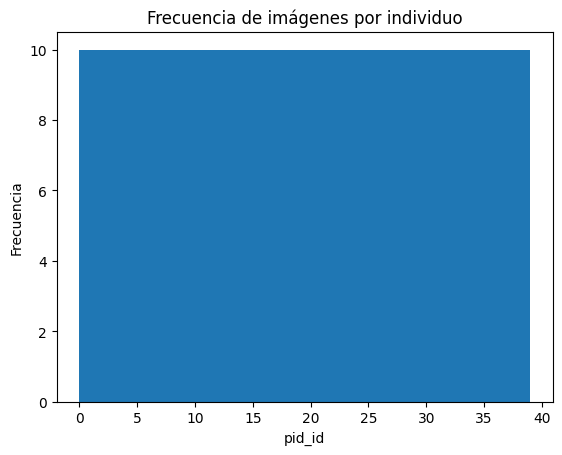

In [6]:
fig, ax = plt.subplots()
ax.hist(df['pid'], bins = people)
ax.set_title('Frecuencia de imágenes por individuo')
ax.set_xlabel('pid_id')
ax.set_ylabel('Frecuencia')
plt.show()

# todos las personas tienen 10 imagénes

#### 2.2. Genere una figura con una imagen de cada uno de los individuos

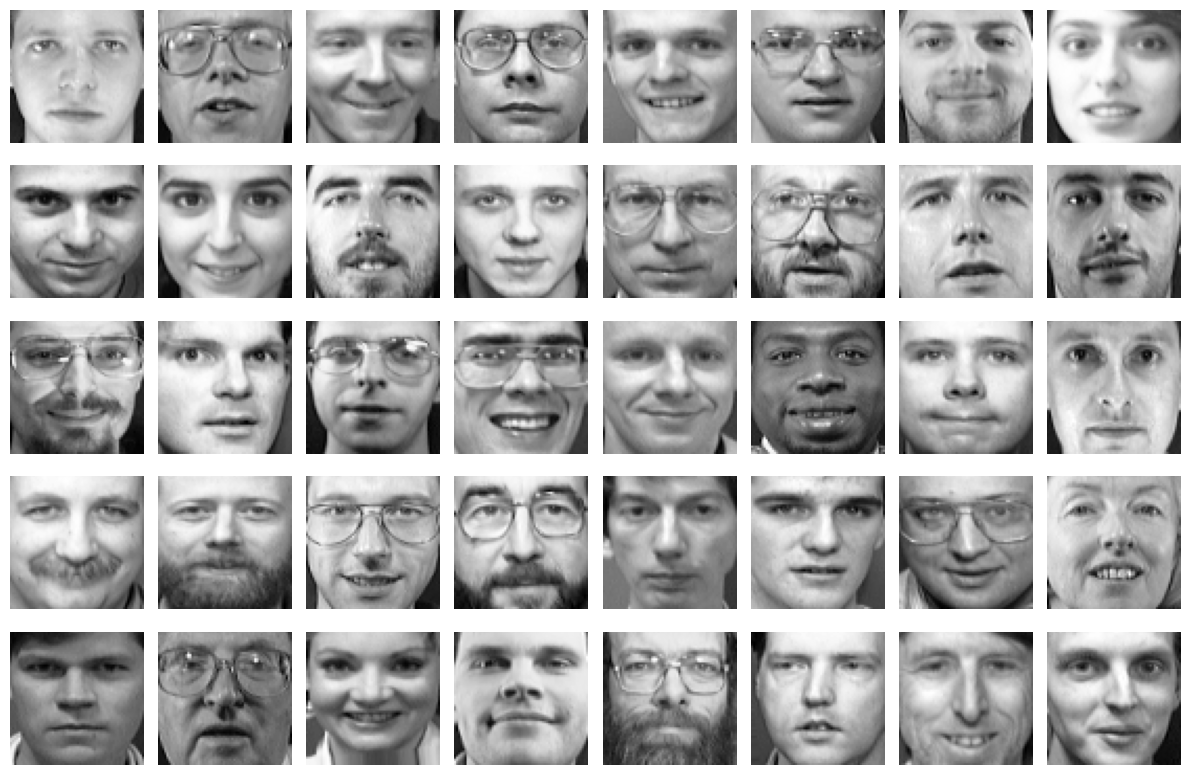

In [7]:
# tomar la primera imagen de cada persona
df_unique = df.groupby('pid').first().reset_index()

# configurar el numero de columnas y filas para un grid
n_rows = 5
n_cols = 8
fig, axes = plt.subplots(n_rows, n_cols, figsize = (12, 8))

# iterar sobre cada persona mostrando la primera imagen
for i, ax in enumerate(axes.flat):
    # el tamaño de las imagenes es 64x64
    image_data = df_unique.iloc[i, 1:].values.reshape(64, 64)
    ax.imshow(image_data, cmap = 'gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen.

Los datos se organizaron en un DataFrme previamente de la siguiente manera:

`#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices`

`X = pd.DataFrame(faces.data)`

`# id personas`

`y = pd.DataFrame(faces.target, columns = ['pid'])`

`# Consolidar todo en un solo DataFrame`

`df = pd.concat([y, X], axis = 1)`

`# Mostrar primeros registros`

`df.head()`

En caso de ser necesario, a continuación encuentra el código funcional:

In [8]:
#Aplasto los datos para poder trabajar "mas intuitivamente" con las matrices
X = pd.DataFrame(faces.data)

# id personas
y = pd.DataFrame(faces.target, columns = ['pid'])

# Consolidar todo en un solo DataFrame
df = pd.concat([y, X], axis = 1)

# Mostrar primeros registros
df.head()

,pid,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos encuentren k=40 clusters y examinaremos su precisión .


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [8]:
X = df.drop(columns = ['pid'], axis = 1)

In [9]:
kmeans = KMeans(n_clusters = 40, random_state = 123, n_init = 10).fit_predict(X)

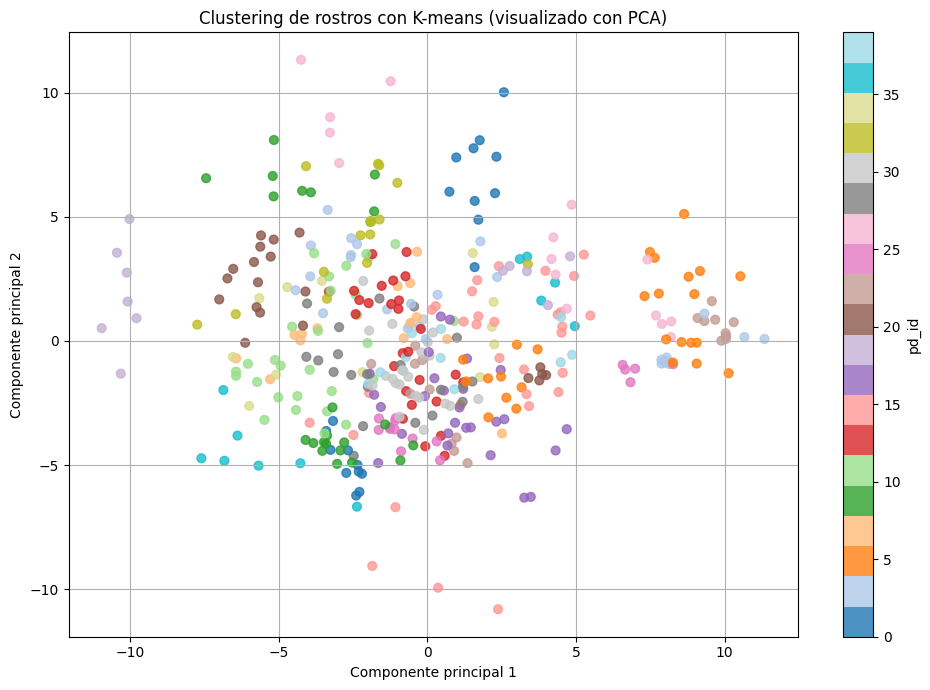

In [10]:
# reducir la dimensionalidad a 2D para visualizar
pca = PCA(n_components = 2, random_state = 123)
X_pca = pca.fit_transform(X)

# graficar
plt.figure(figsize = (10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans, cmap='tab20', alpha=0.8, s=40)
plt.title('Clustering de rostros con K-means (visualizado con PCA)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(scatter, label = 'pd_id')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos.

In [11]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, people + 1):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

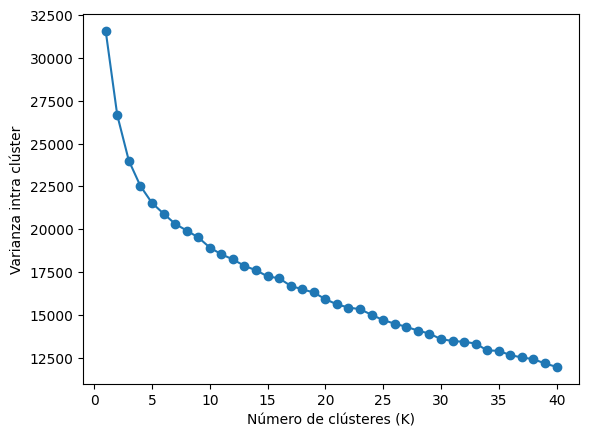

In [12]:
plt.plot(range(1, people + 1), varianza_intra_cluster, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

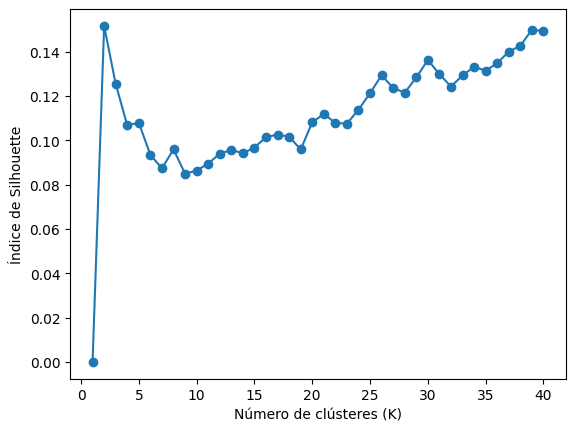

In [13]:
plt.plot(range(1, people + 1), silhouettes, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró.

In [14]:
# estandarizar datos
std_scaler = StandardScaler()
df = std_scaler.fit_transform(X)

In [17]:
var_pca = []

for n in range(1, n_samples + 1):
  pca = PCA(n_components = n, random_state = 123)
  pca.fit_transform(df)
  # calcular varianza explicada
  var = sum(pca.explained_variance_ratio_)
  # guardar todo para comparar
  var_pca.append(var)

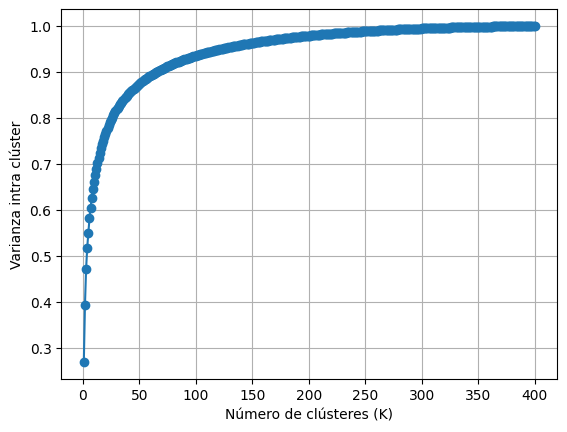

In [18]:
plt.plot(range(1, n_samples + 1), var_pca, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.grid(True)
plt.show()

In [19]:
n_95 = np.argmax(np.array(var_pca) >= 0.95)
n_95

122

In [20]:
# transformar los datos usando el n_95
pca = PCA(n_components = n_95, random_state = 123)

df_pca95 = pd.DataFrame(pca.fit_transform(X))
df_pca95

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,-6.432614,-0.703672,-1.430021,1.278537,2.564395,-0.950593,2.081752,-2.937948,-0.373873,0.243107,...,0.095418,0.087108,0.180561,0.122193,0.007353,-0.055667,-0.110509,-0.155409,0.057754,-0.172440
1,-1.075893,-6.697332,1.842815,5.082048,0.730570,-1.755441,-1.575956,-2.100692,-1.072439,2.061434,...,-0.100252,-0.062405,-0.236370,0.371879,0.020580,-0.129048,0.154203,0.262349,0.067123,-0.117063
2,-5.292948,-1.542511,0.225956,1.111250,2.640090,-1.674545,2.232194,-3.189362,-1.565516,0.599965,...,-0.169965,-0.414396,-0.425151,0.151028,0.216911,-0.066761,0.333236,-0.152085,0.346093,0.090217
3,-4.253575,11.327746,0.091854,-0.220421,1.407454,-0.828449,-1.170798,-0.395940,-0.189309,0.112244,...,-0.028037,-0.157599,-0.088765,0.140494,0.220465,0.122412,0.008057,0.087066,-0.127879,-0.271820
4,-3.962005,-3.293867,3.652879,3.553491,2.785637,-1.815449,-1.152098,-1.140846,-1.095512,1.024149,...,-0.269661,0.239615,0.210953,0.089042,-0.513775,-0.615457,-0.225215,0.083386,-0.265665,0.076360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.200210,-0.753414,2.798518,0.972718,-1.581982,0.637082,2.040178,0.765861,-1.856767,-1.108705,...,-0.101358,-0.206921,0.176146,0.197375,-0.153985,-0.212399,-0.354425,-0.127829,-0.141645,0.308056
396,-5.176738,5.825521,-0.000525,0.778199,1.590730,0.408035,-1.540081,0.802742,-0.697424,-1.734598,...,-0.060885,0.297723,-0.003944,-0.080850,0.040876,-0.106584,-0.152666,0.100257,0.188175,-0.321687
397,2.040765,-1.509609,3.448737,1.715282,-0.910935,1.066443,0.613490,1.692923,-2.792720,-1.396807,...,0.132731,-0.009610,0.362588,0.087946,-0.229755,0.098835,0.005020,0.033505,0.052281,0.137235
398,-5.165234,8.096761,-0.671012,0.658212,1.498925,-1.312583,-1.120616,1.271013,-1.089276,-1.128218,...,-0.013022,0.226588,0.072674,-0.036565,0.080385,0.091564,-0.045358,0.014456,-0.196902,-0.138995


In [32]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, n_95):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init = 10).fit(df_pca95)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(df_pca95, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

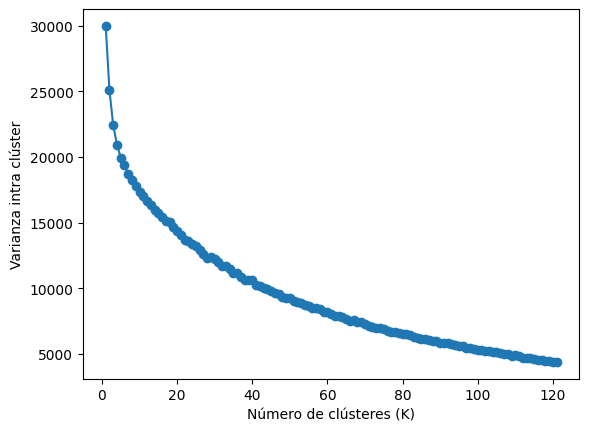

In [33]:
plt.plot(range(1, n_95), varianza_intra_cluster, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

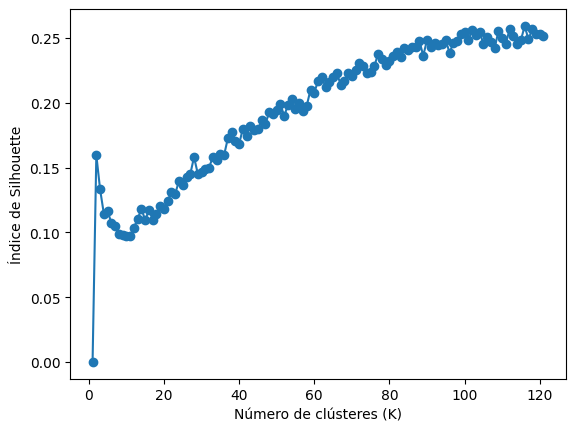

In [34]:
plt.plot(range(1, n_95), silhouettes, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

El silhouettes score tiene un rango cuyo mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican conglomerados superpuestos. Los valores negativos generalmente indican que una muestra se ha asignado al conglomerado equivocado, ya que otro conglomerado es más similar.

Luego de utilizar PCA  mejoramos este indicador casi para cualquier numero de culsteres.

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [35]:
varianza_intra_cluster = []
silhouettes = []
for k in range (1, n_95 + 1):
    kmediods = KMedoids(n_clusters = k, metric = 'euclidean', random_state = 123).fit(df_pca95)
    varianza_intra_cluster.append(kmediods.inertia_)
    try:
        silhouette = silhouette_score(X, kmediods.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

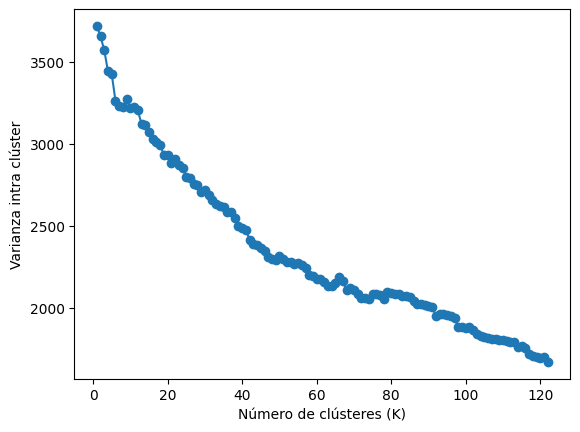

In [36]:
plt.plot(range(1, n_95 + 1), varianza_intra_cluster, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

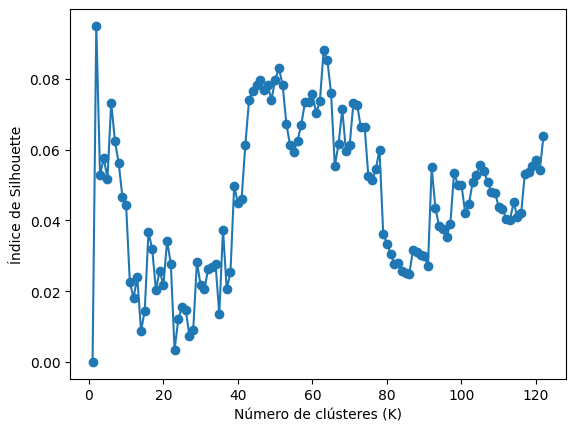

In [37]:
plt.plot(range(1, n_95 + 1), silhouettes, marker = 'o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

Utilizando el silhouettes score es posible apreciar que k-medioides tiene un menor rendimiento comporado con k-medias.

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

In [44]:
# evaluar grilla
k_range = range(2, n_95 + 1)
results = []

for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init = 10).fit(df_pca95)
    silhouette_kmeans = silhouette_score(df_pca95, kmeans.labels_)

    # K-medoides
    kmedoids = KMedoids(n_clusters = k, metric = 'euclidean',
                        random_state = 123).fit(df_pca95)
    silhouette_kmedoids = silhouette_score(df_pca95, kmedoids.labels_)

    results.append({
        'k': k,
        'kmeans_silhouette': silhouette_kmeans,
        'kmedoids_silhouette': silhouette_kmedoids,
        'kmeans_inertia': kmeans.inertia_,
        'kmedoids_inertia': kmedoids.inertia_
    })

# convertir resultados en df
import pandas as pd
results_df = pd.DataFrame(results)

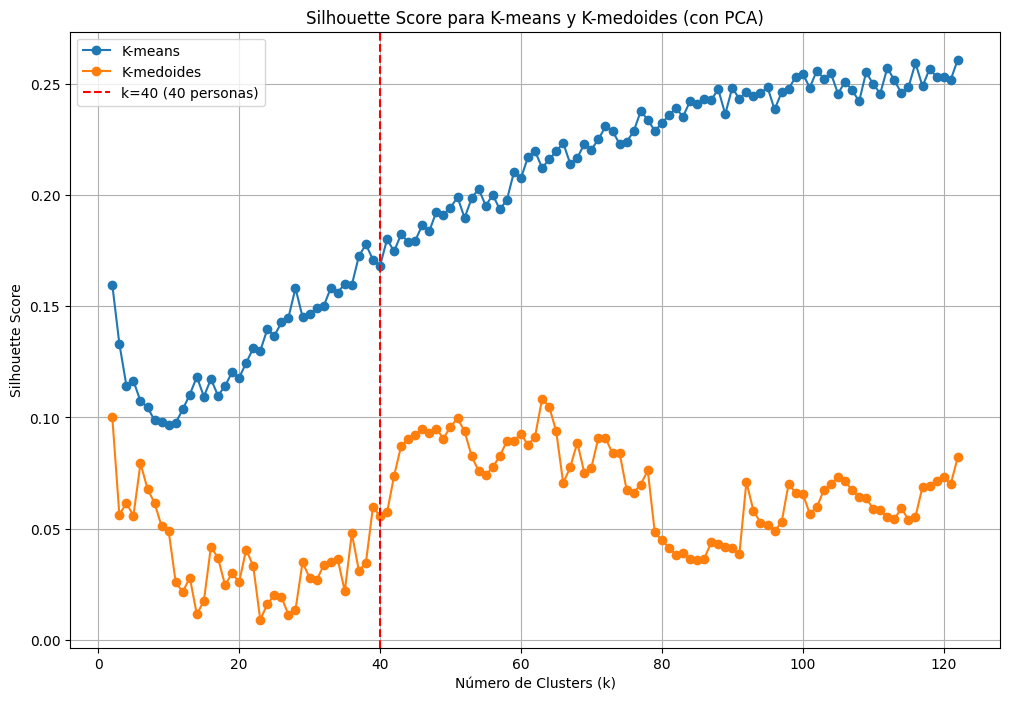

In [51]:
# graficar solucion

plt.figure(figsize=(12, 8))
plt.plot(results_df['k'], results_df['kmeans_silhouette'], marker = 'o', label = 'K-means')
plt.plot(results_df['k'], results_df['kmedoids_silhouette'], marker = 'o', label = 'K-medoides')
plt.axvline(x = 40, color = 'r', linestyle = '--', label = 'k=40 (40 personas)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para K-means y K-medoides (con PCA)')
plt.legend()
plt.grid()
plt.show()

En la grafica anterior contrastamos el desempeño de k-medias y k-medioides (con PCA) a partir del silhouettes score. Se puede apreciar qe k-medias nos permite tener grupos con una mejor separación. Esto sucede para todas las cantidades de clusters, incluyendo k=40.

Si bien sabemos que el numero de cluster es 40, los modelos sugieren elegir un mayor numero de clusters pues se generan grupos menos solapados y con menor varianza intra grupos (ver la siguiente grafica)

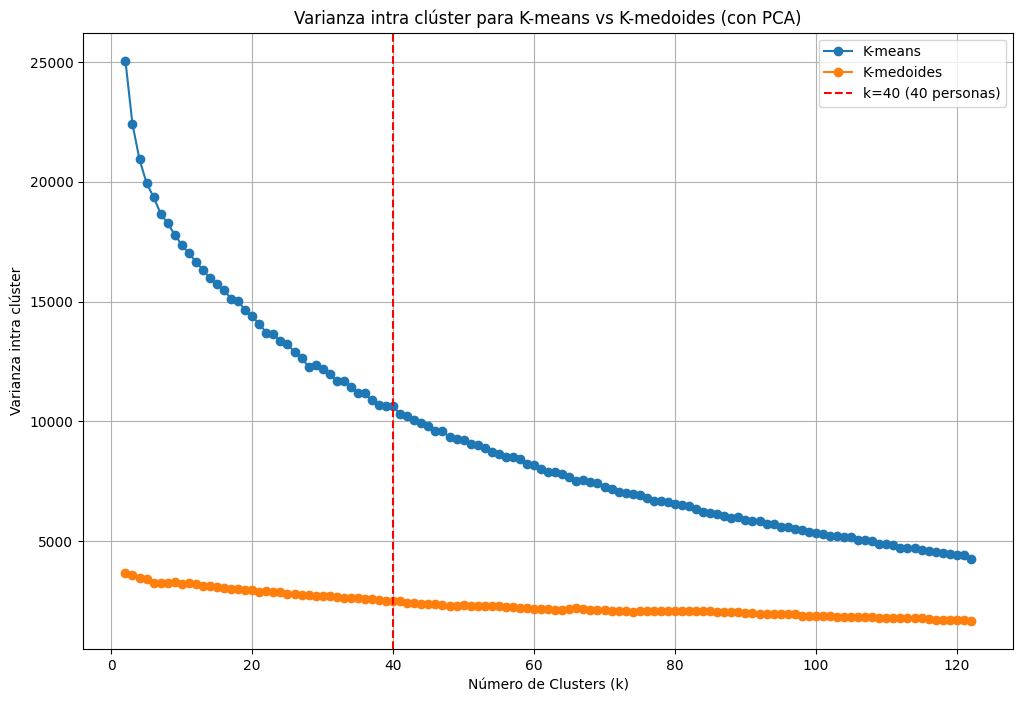

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(results_df['k'], results_df['kmeans_inertia'], marker = 'o', label = 'K-means')
plt.plot(results_df['k'], results_df['kmedoids_inertia'], marker = 'o', label = 'K-medoides')
plt.axvline(x = 40, color = 'r', linestyle = '--', label = 'k=40 (40 personas)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Varianza intra clúster')
plt.title('Varianza intra clúster para K-means vs K-medoides (con PCA)')
plt.legend()
plt.grid()
plt.show()